In [ ]:
pip install alpha_vantage

In [ ]:
import pandas as pd

In [ ]:
from alpha_vantage.timeseries import TimeSeries

API_key = 'SYX1WHNVGDZTOUYP'

ts = TimeSeries(key = API_key, output_format = 'pandas')

data = ts.get_daily('AAPL', outputsize = 'full')

data[0]

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-02-08,189.385,189.535,187.3500,188.32,39266250.0
2024-02-07,190.640,191.050,188.6100,189.41,53438955.0
2024-02-06,186.860,189.310,186.7695,189.30,43490759.0
2024-02-05,188.150,189.250,185.8400,187.68,69668820.0
2024-02-02,179.860,187.330,179.2500,185.85,102551680.0
...,...,...,...,...,...
1999-11-05,84.620,88.370,84.0000,88.31,3721500.0
1999-11-04,82.060,85.370,80.6200,83.62,3384700.0
1999-11-03,81.620,83.250,81.0000,81.50,2932700.0


In [ ]:
monthly_data = ts.get_monthly('AAPL')

monthly_data[0]

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-02-08,183.985,191.05,179.2500,188.32,3.733019e+08
2024-01-31,187.150,196.38,180.1700,184.40,1.187140e+09
2023-12-29,190.330,199.62,187.4511,192.53,1.062318e+09
2023-11-30,171.000,192.93,170.1200,189.95,1.099761e+09
2023-10-31,171.220,182.34,165.6700,170.77,1.172846e+09
...,...,...,...,...,...
2000-04-28,135.500,139.50,104.8700,124.06,7.734290e+07
2000-03-31,118.560,150.38,114.0000,135.81,7.766390e+07
2000-02-29,104.000,119.94,97.0000,114.62,6.535520e+07


In [ ]:
data[0].columns

Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount'],
      dtype='object')

In [ ]:
columns_needed = ['4. close', '5. volume']

In [ ]:
daily_data = ts.get_daily('MSFT', outputsize='full')

In [ ]:
df = daily_data[0][columns_needed]

In [ ]:
df = df.reset_index()

In [ ]:
df = df.astype({'date': 'datetime64[ns]', '4. close': 'float', '5. volume': 'int'}, copy=False)

In [ ]:
df = df.rename(columns={"4. close": "close", "5. volume": "volume"})

In [ ]:
df.head()

,date,close,volume
0,2024-02-08,414.11,20554530
1,2024-02-07,414.05,22340526
2,2024-02-06,405.49,18382624
3,2024-02-05,405.65,25352286
4,2024-02-02,411.22,28256670


In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 6107 artists>

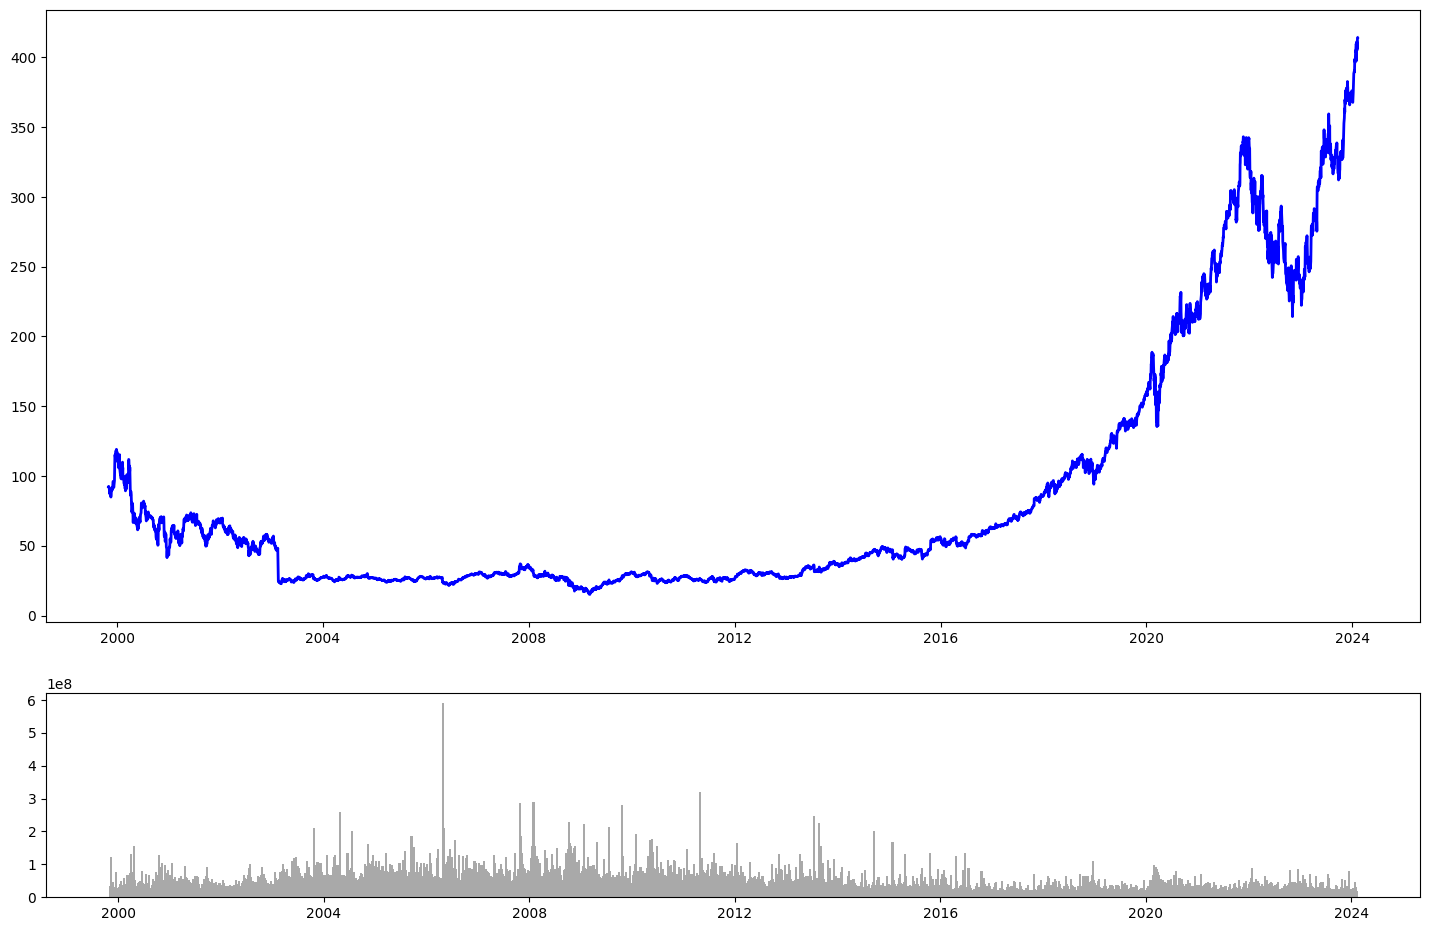

In [ ]:
plt.rc('figure', figsize=(15, 10))

fig, axes = plt.subplots(2, 1,
            gridspec_kw={'height_ratios': [3, 1]})
fig.tight_layout(pad=3)

date = df['date']
close = df['close']
vol = df['volume']

plot_price = axes[0]
plot_price.plot(date, close, color='blue',
linewidth=2, label='Price')

plot_vol = axes[1]
plot_vol.bar(date, vol, width=15, color='darkgrey')